In [29]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 5000
df = pd.DataFrame({
    "customer_id": ["CUST_" + str(i) for i in range(n)],
    "region": np.random.choice(["Pune", "Mumbai", "Nashik"], n),
    "usage_type": np.random.choice(["Residential", "Agricutural", "Industrial"], n),
    "daily_usage_liters": np.random.randint(300, 4000, n),
    "system_uptime_percent": np.random.uniform(70, 100, n).round(2),
    "reduction_percent": np.random.uniform(45, 95, n).round(2),
    "days_since_maintenance": np.random.randint(5, 120, n),
    "complaint_count": np.random.randint(0, 6, n)
})

df.to_csv("customer_data.csv", index=False)


In [30]:
import pandas as pd
df = pd.read_csv("customer_data.csv")
df.head()

,customer_id,region,usage_type,daily_usage_liters,system_uptime_percent,reduction_percent,days_since_maintenance,complaint_count
0,CUST_0,Nashik,Industrial,1210,92.62,75.53,79,3
1,CUST_1,Pune,Residential,893,73.31,56.24,50,4
2,CUST_2,Nashik,Industrial,1695,84.03,75.65,81,4
3,CUST_3,Nashik,Residential,3988,72.13,76.41,63,3
4,CUST_4,Pune,Industrial,899,87.95,81.71,65,2


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   region                  5000 non-null   object 
 2   usage_type              5000 non-null   object 
 3   daily_usage_liters      5000 non-null   int64  
 4   system_uptime_percent   5000 non-null   float64
 5   reduction_percent       5000 non-null   float64
 6   days_since_maintenance  5000 non-null   int64  
 7   complaint_count         5000 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 312.6+ KB


In [32]:
df.describe()

,daily_usage_liters,system_uptime_percent,reduction_percent,days_since_maintenance,complaint_count
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2136.459800,84.954916,70.461284,61.275000,2.517600
std,1066.217857,8.737475,14.372842,33.584588,1.695602
min,300.000000,70.000000,45.010000,5.000000,0.000000
25%,1204.000000,77.320000,58.245000,31.000000,1.000000
50%,2114.500000,84.760000,70.730000,61.000000,3.000000
75%,3056.000000,92.700000,82.762500,91.000000,4.000000
max,3999.000000,99.990000,95.000000,119.000000,5.000000


In [33]:
df.isnull().sum()

,0
customer_id,0
region,0
usage_type,0
daily_usage_liters,0
system_uptime_percent,0
reduction_percent,0
days_since_maintenance,0
complaint_count,0


In [34]:
# remove duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

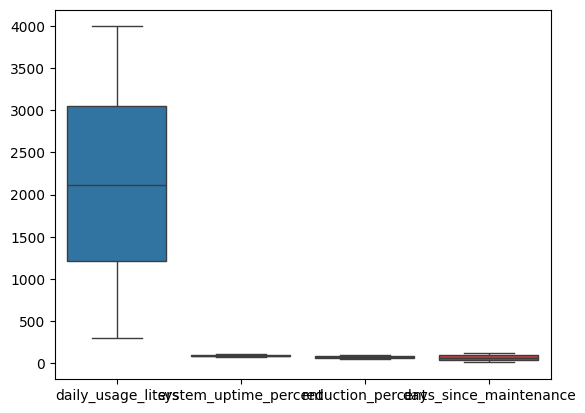

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df[["daily_usage_liters", "system_uptime_percent", "reduction_percent", "days_since_maintenance"]])
plt.show()

In [36]:
# Example: Remove outliers using IQR method
Q1 = df["daily_usage_liters"].quantile(0.25)
Q3 = df["daily_usage_liters"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df["daily_usage_liters"] >= lower) & (df["daily_usage_liters"] <= upper)]

In [37]:
# Example: Remove outliers using IQR method
Q1 = df["reduction_percent"].quantile(0.25)
Q3 = df["reduction_percent"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df["reduction_percent"] >= lower) & (df["reduction_percent"] <= upper)]

In [38]:
df = df[df['system_uptime_percent'] <= 100]
df = df[df['reduction_percent'] <= 100]


In [39]:
df['region'].value_counts()
df['usage_type'].value_counts()


,count
usage_type,
Agricutural,1707
Industrial,1677
Residential,1616


In [40]:
df.to_csv("clean_customer_data.csv", index=False)


In [46]:
import pandas as pd

df = pd.read_csv("clean_customer_data.csv")
df.head()

,customer_id,region,usage_type,daily_usage_liters,system_uptime_percent,reduction_percent,days_since_maintenance,complaint_count
0,CUST_0,Nashik,Industrial,1210,92.62,75.53,79,3
1,CUST_1,Pune,Residential,893,73.31,56.24,50,4
2,CUST_2,Nashik,Industrial,1695,84.03,75.65,81,4
3,CUST_3,Nashik,Residential,3988,72.13,76.41,63,3
4,CUST_4,Pune,Industrial,899,87.95,81.71,65,2


In [42]:
# Maintenance Urgency
df["maintenance_urgency"] = df["days_since_maintenance"] / df["system_uptime_percent"]

In [43]:
# Usage Performance Ratio
df["usage_performance_ratio"] = df["daily_usage_liters"] / df["reduction_percent"]

In [44]:
# Uptime vs. Quality Gap
df["uptime_quality_gap"] = df["system_uptime_percent"] - df["reduction_percent"]

In [45]:
# Complaints per Day of Delay
df["complaint_rate"] = df["complaint_count"] / df["days_since_maintenance"]
df["complaint_rate"].replace([np.inf, -np.inf], 0, inplace=True) #Handle division by zero

/tmp/ipython-input-45-1173104618.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["complaint_rate"].replace([np.inf, -np.inf], 0, inplace=True) #Handle division by zero


In [48]:
from sklearn.preprocessing import StandardScaler

features = [
    "daily_usage_liters",
    "system_uptime_percent",
    "reduction_percent",
    "days_since_maintenance",
    "complaint_count",
]

scaler = StandardScaler()
scaler_data = scaler.fit_transform(df[features])

# Convert back to DataFrame for easy use
df_scaled = pd.DataFrame(scaler_data, columns=features)
df_scaled["customer_id"] = df["customer_id"].values #add back customer ID for traceability

In [49]:
df_scaled.to_csv("prepared_customer_data.csv", index=False)

<Axes: >

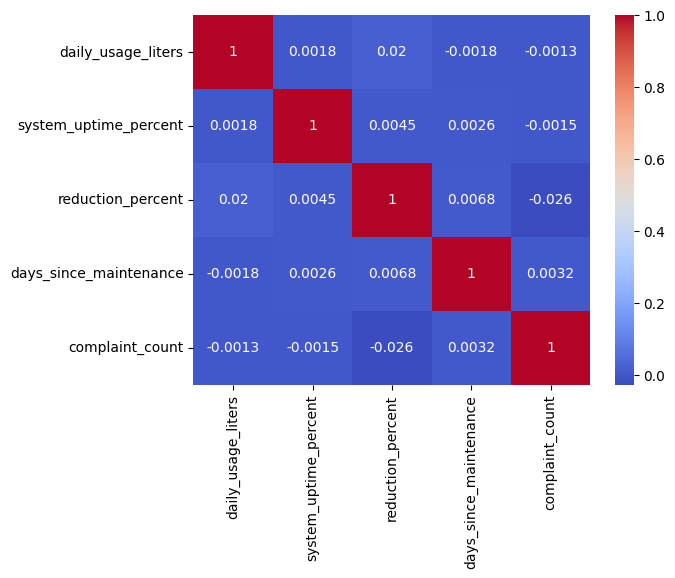

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm")


In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("prepared_customer_data.csv")
df.head()

,daily_usage_liters,system_uptime_percent,reduction_percent,days_since_maintenance,complaint_count,customer_id
0,-0.869009,0.877353,0.352695,0.527825,0.284529,CUST_0
1,-1.166351,-1.332889,-0.989554,-0.335753,0.874349,CUST_1
2,-0.414084,-0.105867,0.361044,0.587382,0.874349,CUST_2
3,1.736723,-1.467953,0.413927,0.051368,0.284529,CUST_3
4,-1.160723,0.342820,0.782715,0.110925,-0.305291,CUST_4


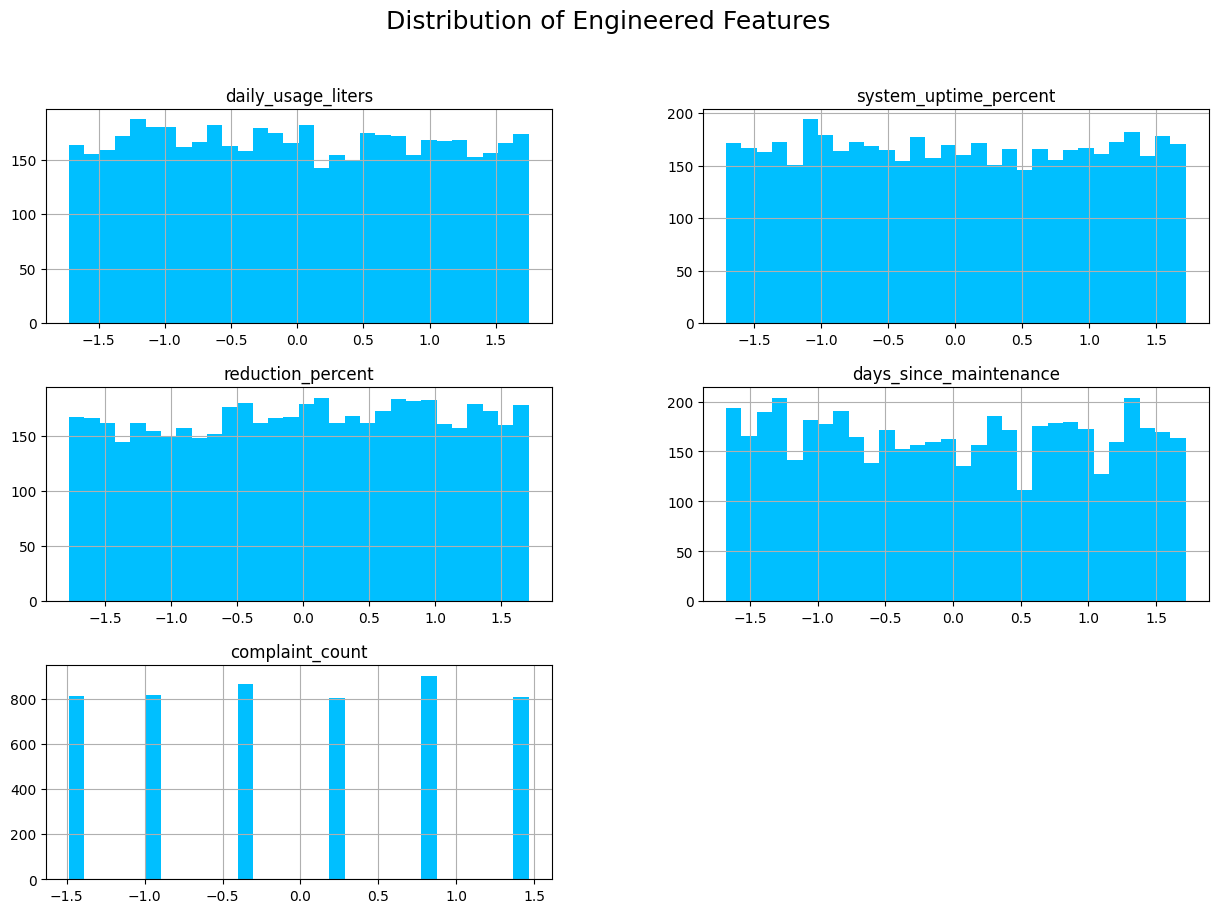

In [52]:
df.hist(bins=30, figsize=(15, 10), color="#00BFFF")
plt.suptitle("Distribution of Engineered Features", fontsize=18)
plt.show()

In [53]:
sns.boxplot(x='usage_type', y='maintenance_urgency', data=df)
plt.title("Maintenance Urgency by Usage Type")
plt.show()


ValueError: Could not interpret value `usage_type` for `x`. An entry with this name does not appear in `data`.

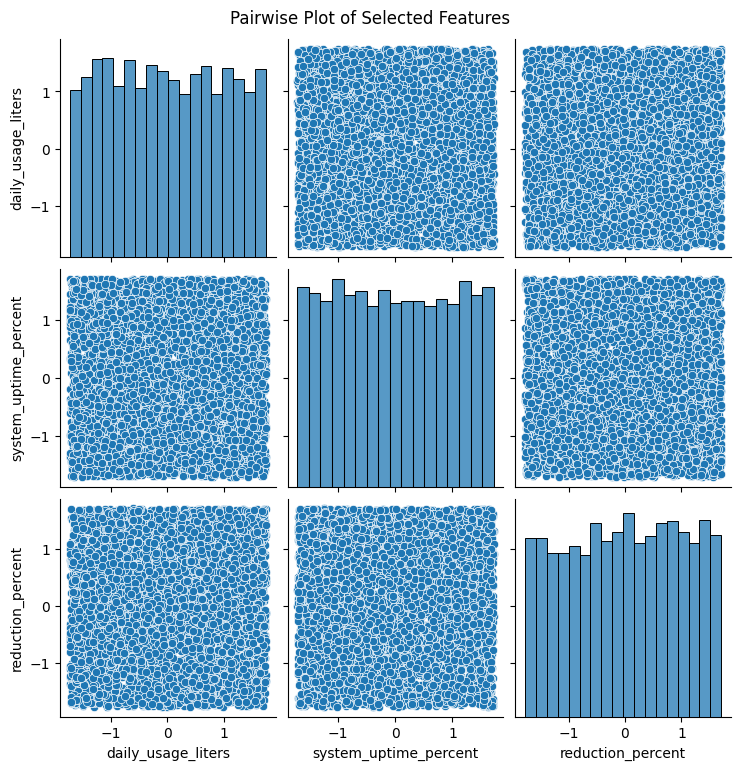

In [55]:
selected = [
    'daily_usage_liters',
    'system_uptime_percent',
    'reduction_percent',
]

sns.pairplot(df[selected])
plt.suptitle("Pairwise Plot of Selected Features", y=1.02)
plt.show()


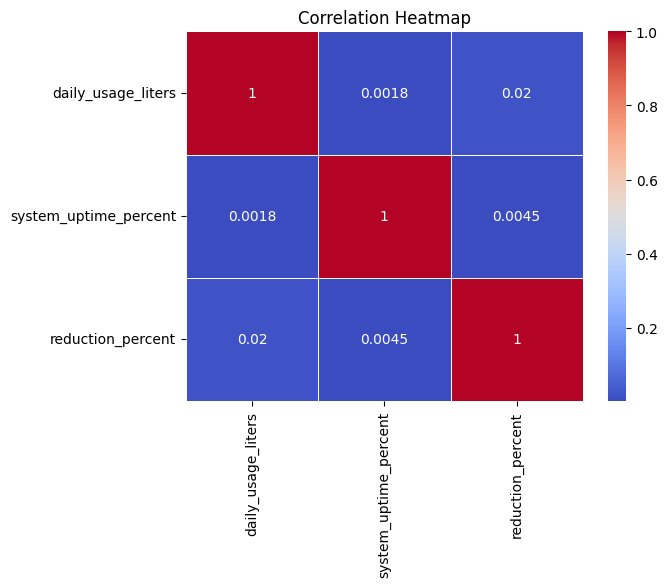

In [56]:
corr = df[selected].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


/tmp/ipython-input-58-1162748462.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


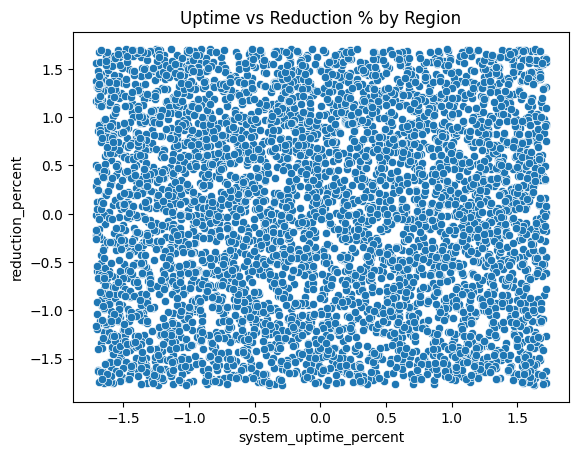

In [58]:
sns.scatterplot(
    x='system_uptime_percent',
    y='reduction_percent',
    data=df,
    palette='Set2'
)
plt.title("Uptime vs Reduction % by Region")
plt.show()


In [59]:
import pandas as pd
df = pd.read_csv("prepared_customer_data.csv")
df.head()


,daily_usage_liters,system_uptime_percent,reduction_percent,days_since_maintenance,complaint_count,customer_id
0,-0.869009,0.877353,0.352695,0.527825,0.284529,CUST_0
1,-1.166351,-1.332889,-0.989554,-0.335753,0.874349,CUST_1
2,-0.414084,-0.105867,0.361044,0.587382,0.874349,CUST_2
3,1.736723,-1.467953,0.413927,0.051368,0.284529,CUST_3
4,-1.160723,0.342820,0.782715,0.110925,-0.305291,CUST_4


In [60]:
import pandas as pd
df = pd.read_csv("prepared_customer_data.csv")
df.head()

,daily_usage_liters,system_uptime_percent,reduction_percent,days_since_maintenance,complaint_count,customer_id
0,-0.869009,0.877353,0.352695,0.527825,0.284529,CUST_0
1,-1.166351,-1.332889,-0.989554,-0.335753,0.874349,CUST_1
2,-0.414084,-0.105867,0.361044,0.587382,0.874349,CUST_2
3,1.736723,-1.467953,0.413927,0.051368,0.284529,CUST_3
4,-1.160723,0.342820,0.782715,0.110925,-0.305291,CUST_4


In [62]:
features = [
    'daily_usage_liters',
    'system_uptime_percent',
    'complaint_count'
]

X = df[features]
# These are all numerical, scaled, and engineered

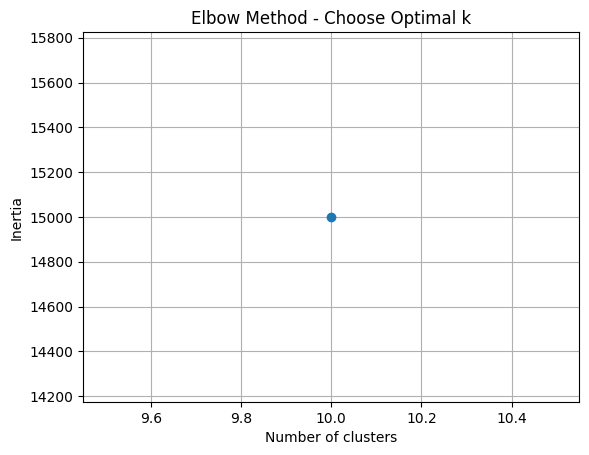

ValueError: x and y must have same first dimension, but have shapes (1,) and (2,)

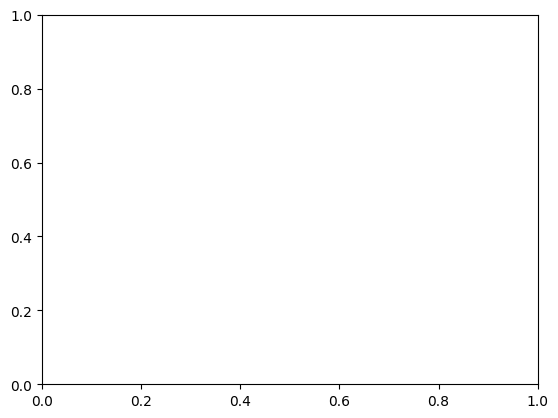

In [64]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(X)
  inertia.append(km.inertia_)

  plt.plot(range(10, 11), inertia, marker='o')
  plt.title('Elbow Method - Choose Optimal k')
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')
  plt.grid()
  plt.show()

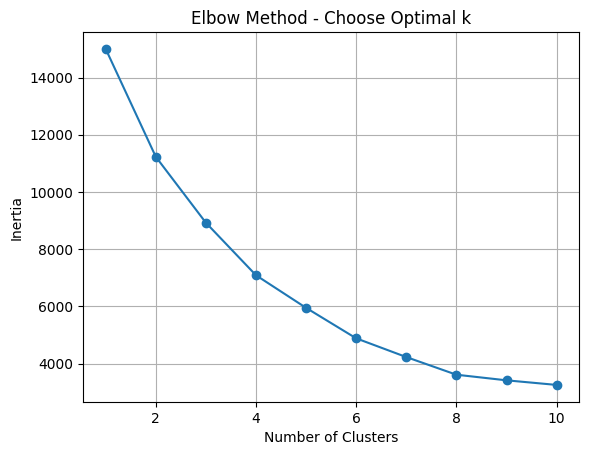

In [65]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method - Choose Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()


In [67]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)


In [68]:
df.groupby('cluster')[features].mean().round(2)

,daily_usage_liters,system_uptime_percent,complaint_count
cluster,,,
0,-0.14,0.03,-1.05
1,0.99,0.02,0.50
2,-0.88,-0.05,0.73


In [69]:
def assign_label(cluster):
    if cluster == 0:
        return "Maintenance Risk"
    elif cluster == 1:
        return "Efficient User"
    else:
        return "Low Performer"

df['cluster_label'] = df['cluster'].apply(assign_label)


In [70]:
df.to_csv("clustered_customers.csv", index=False)


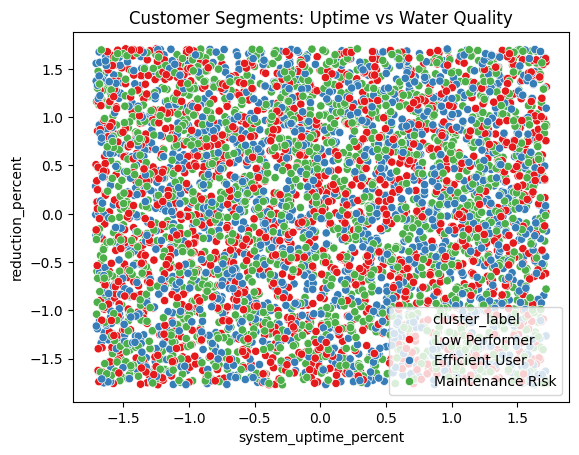

In [71]:
import seaborn as sns

sns.scatterplot(
    x='system_uptime_percent',
    y='reduction_percent',
    hue='cluster_label',
    data=df,
    palette='Set1'
)
plt.title("Customer Segments: Uptime vs Water Quality")
plt.show()


In [72]:
import pandas as pd
df = pd.read_csv("clustered_customers.csv")
df.head()


,daily_usage_liters,system_uptime_percent,reduction_percent,days_since_maintenance,complaint_count,customer_id,cluster,cluster_label
0,-0.869009,0.877353,0.352695,0.527825,0.284529,CUST_0,2,Low Performer
1,-1.166351,-1.332889,-0.989554,-0.335753,0.874349,CUST_1,2,Low Performer
2,-0.414084,-0.105867,0.361044,0.587382,0.874349,CUST_2,2,Low Performer
3,1.736723,-1.467953,0.413927,0.051368,0.284529,CUST_3,1,Efficient User
4,-1.160723,0.342820,0.782715,0.110925,-0.305291,CUST_4,2,Low Performer


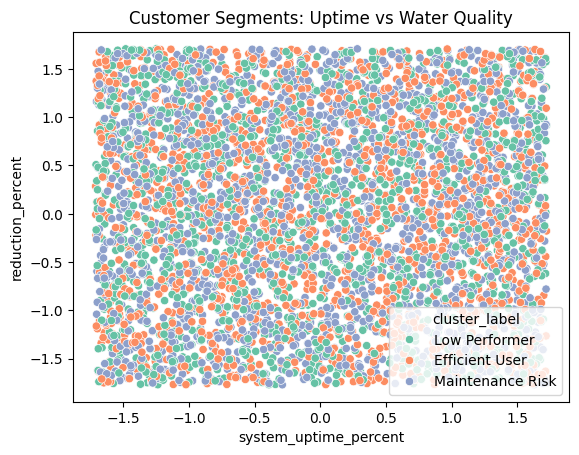

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    x='system_uptime_percent',
    y='reduction_percent',
    hue='cluster_label',
    data=df,
    palette='Set2'
)
plt.title("Customer Segments: Uptime vs Water Quality")
plt.show()


In [74]:
sns.boxplot(x='cluster_label', y='maintenance_urgency', data=df)
plt.title("Maintenance Urgency by Customer Segment")
plt.show()

ValueError: Could not interpret value `maintenance_urgency` for `y`. An entry with this name does not appear in `data`.

/tmp/ipython-input-75-3800986130.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster_label', data=df, palette='Set1')


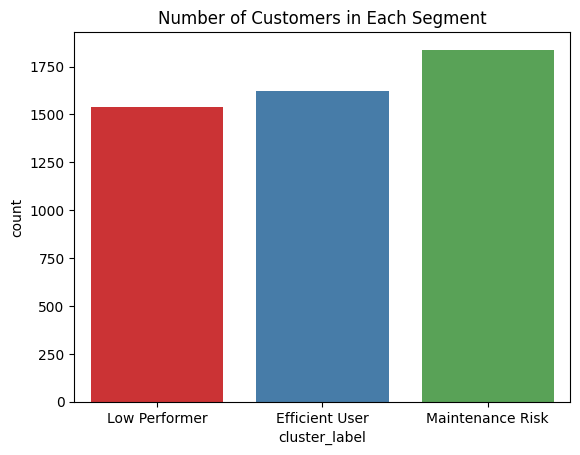

In [75]:
sns.countplot(x='cluster_label', data=df, palette='Set1')
plt.title("Number of Customers in Each Segment")
plt.show()


In [76]:
# Before scaling
original = pd.read_csv("clean_customer_data.csv")

# After clustering
clustered = pd.read_csv("prepared_customer_data.csv")

# Merge original values into final DataFrame
final = clustered.copy()
final["system_uptime_percent"] = original["system_uptime_percent"]
final["reduction_percent"] = original["reduction_percent"]
final["daily_usage_liters"] = original["daily_usage_liters"]

final.to_csv("clustered_customers_tableau.csv", index=False)


In [82]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)
n = 5000

# Step 1: Generate realistic customer data
df = pd.DataFrame({
    'customer_id': ['CUST_' + str(i) for i in range(n)],
    'region': np.random.choice(['Mumbai', 'Pune', 'Nashik'], n),
    'usage_type': np.random.choice(['Residential', 'Agricultural', 'Industrial'], n),
    'daily_usage_liters': np.random.randint(300, 4000, n),
    'system_uptime_percent': np.random.uniform(70, 100, n).round(2),
    'reduction_percent': np.random.uniform(45, 95, n).round(2),
    'days_since_maintenance': np.random.randint(5, 120, n),
    'complaint_count': np.random.randint(0, 6, n)
})

# Step 2: Feature engineering
df['maintenance_urgency'] = (df['days_since_maintenance'] / df['system_uptime_percent']).round(2)

# Step 3: Assign cluster labels based on business logic
def assign_cluster(row):
    if row['maintenance_urgency'] > 1 or row['system_uptime_percent'] < 80:
        return "Maintenance Risk"
    elif row['reduction_percent'] > 80 and row['system_uptime_percent'] > 90:
        return "Efficient User"
    else:
        return "Low Performer"

df['cluster_label'] = df.apply(assign_cluster, axis=1)

# Step 4: Add cluster descriptions
def get_description(label):
    if label == "Maintenance Risk":
        return "Customer with poor uptime and delayed maintenance"
    elif label == "Efficient User":
        return "Customer with strong uptime and excellent water quality"
    else:
        return "Customer with average performance and low efficiency"

df["cluster_description"] = df["cluster_label"].apply(get_description)

# Step 5: Add recommendations
def get_recommendation(label):
    if label == "Maintenance Risk":
        return "Schedule urgent maintenance"
    elif label == "Efficient User":
        return "Offer loyalty upgrade"
    else:
        return "Suggest usage optimization or upgrade"

df["recommendation"] = df["cluster_label"].apply(get_recommendation)

# Step 6: Add simulated install month for optional time filter
df["install_month"] = np.random.choice(
    ["2024-01", "2024-02", "2024-03", "2024-04", "2024-05", "2024-06"], size=n
)

# Step 7: Save to CSV
df.to_csv("clustered_customers_final.csv", index=False)
print("✅ File saved as clustered_customers_final.csv")
df.head()


✅ File saved as clustered_customers_final.csv


,customer_id,region,usage_type,daily_usage_liters,system_uptime_percent,reduction_percent,days_since_maintenance,complaint_count,maintenance_urgency,cluster_label,cluster_description,recommendation,install_month
0,CUST_0,Nashik,Industrial,1210,92.62,75.53,79,3,0.85,Low Performer,Customer with average performance and low effi...,Suggest usage optimization or upgrade,2024-01
1,CUST_1,Mumbai,Residential,893,73.31,56.24,50,4,0.68,Maintenance Risk,Customer with poor uptime and delayed maintenance,Schedule urgent maintenance,2024-01
2,CUST_2,Nashik,Industrial,1695,84.03,75.65,81,4,0.96,Low Performer,Customer with average performance and low effi...,Suggest usage optimization or upgrade,2024-06
3,CUST_3,Nashik,Residential,3988,72.13,76.41,63,3,0.87,Maintenance Risk,Customer with poor uptime and delayed maintenance,Schedule urgent maintenance,2024-03
4,CUST_4,Mumbai,Industrial,899,87.95,81.71,65,2,0.74,Low Performer,Customer with average performance and low effi...,Suggest usage optimization or upgrade,2024-06
